# Time Series Forecast On Electric_Production dataset

In [96]:
# import neccessory libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Step : 1 Loading Time Series Data In Pandas

In [97]:
# import dataset
data = pd.read_csv('D:/dataset/Electric_Production.csv')

In [98]:
# top rows
data.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [99]:
# rename columns
data.columns=['Date','Electric_production']

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 397 non-null    object 
 1   Electric_production  397 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


In [101]:
# converting object date in datetime
data['Date'] = pd.to_datetime(data['Date'])

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 397 non-null    datetime64[ns]
 1   Electric_production  397 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.3 KB


In [103]:
# set Date column as index
data =data.set_index(data['Date'])

In [104]:
data.index

DatetimeIndex(['1985-01-01', '1985-02-01', '1985-03-01', '1985-04-01',
               '1985-05-01', '1985-06-01', '1985-07-01', '1985-08-01',
               '1985-09-01', '1985-10-01',
               ...
               '2017-04-01', '2017-05-01', '2017-06-01', '2017-07-01',
               '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01',
               '2017-12-01', '2018-01-01'],
              dtype='datetime64[ns]', name='Date', length=397, freq=None)

In [105]:
# drop date column
data.drop('Date',axis=1,inplace =True)

In [106]:
data.head()

,Electric_production
Date,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


# Step -2 Checking Stationarity

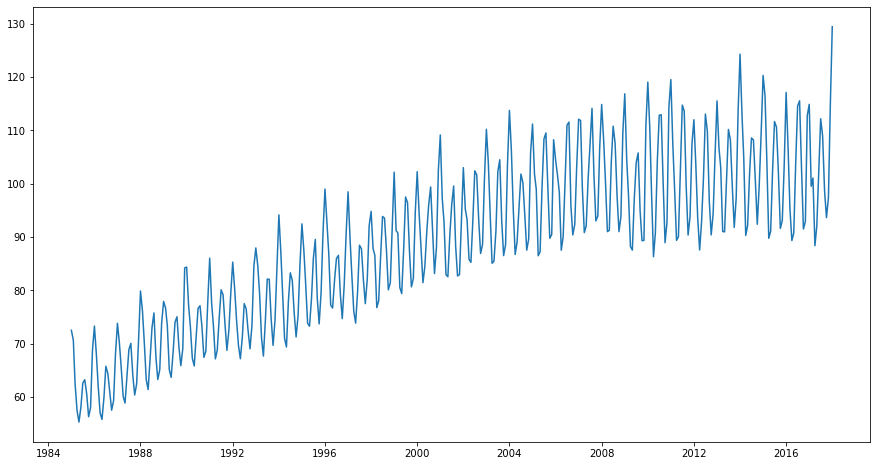

In [107]:
# lets see how data is plotted
plt.figure(figsize=(15,8))
plt.plot(data)

#### By observing the graph we can say this data is not stationary

In [108]:
# import adfuller for check stationary
from statsmodels.tsa.stattools import adfuller

In [109]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(x):
    result=adfuller(x)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [110]:
adfuller_test(data)

ADF Test Statistic : -2.2569903500472357
p-value : 0.1862146911658708
#Lags Used : 15
Number of Observations Used : 381
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


This data is not stationary

# Step - 3 Making data Stationary by using Differencing 



In [111]:
data['Seasonal First Difference'] = data['Electric_production']-data['Electric_production'].shift(12)

In [112]:
data

,Electric_production,Seasonal First Difference
Date,,
1985-01-01,72.5052,NaN
1985-02-01,70.6720,NaN
1985-03-01,62.4502,NaN
1985-04-01,57.4714,NaN
1985-05-01,55.3151,NaN
...,...,...
2017-09-01,98.6154,-4.1483
2017-10-01,93.6137,2.1270
2017-11-01,97.3359,4.4459


In [113]:
adfuller_test(data['Seasonal First Difference'].dropna())

ADF Test Statistic : -5.673482023381761
p-value : 8.812644938088861e-07
#Lags Used : 12
Number of Observations Used : 372
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


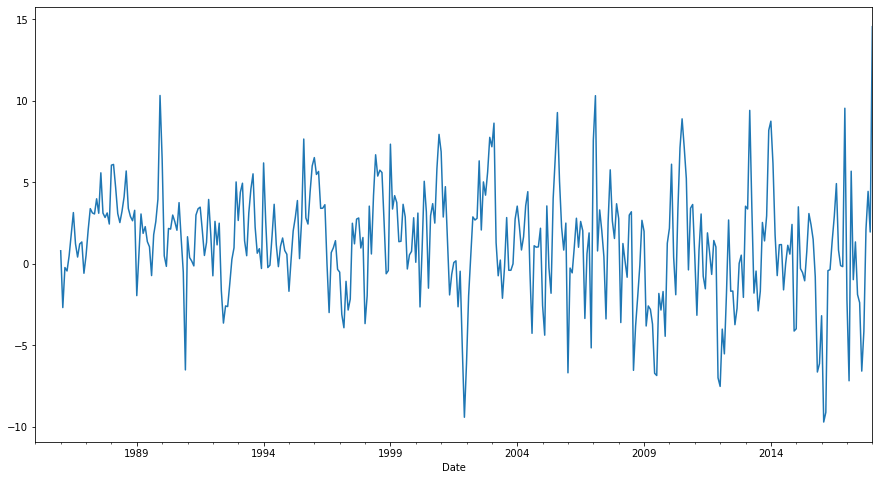

In [114]:
plt.figure(figsize=(15,8))
data['Seasonal First Difference'].plot()

# Step -4 Ploting ACFand PACF graph for selecting p and q in Model

In [115]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

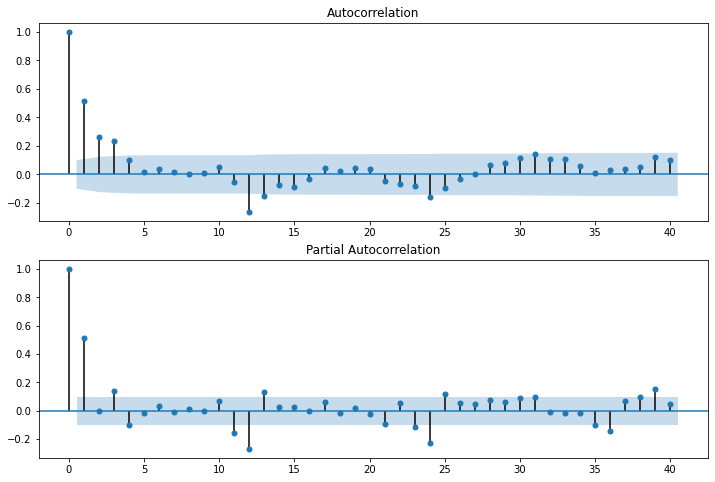

In [116]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

parameter for Arima model

p =2

d= 1

q= 0 or 1


# Step-5 Fitting SARIMA model to dataset

In [117]:
model=sm.tsa.statespace.SARIMAX(data['Electric_production'],order=(2, 1, 1),seasonal_order=(2,1,1,12))
results=model.fit()


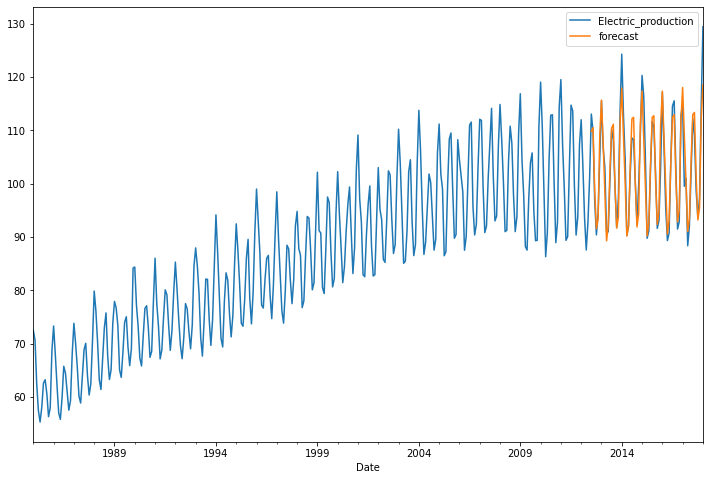

In [118]:
data['forecast']=results.predict(start=330,end=396,dynamic=True)
data[['Electric_production','forecast']].plot(figsize=(12,8))

# Step -6 Forecasting a Time Series

In [138]:
from pandas.tseries.offsets import DateOffset
future_dates=[data.index[-1]+ DateOffset(months=x)for x in range(0,96)]

In [139]:
future_datest_data=pd.DataFrame(index=future_dates[1:],columns=data.columns)

In [140]:
future_datest_data.tail()

,Electric_production,Seasonal First Difference,forecast
2025-08-01,NaN,NaN,NaN
2025-09-01,NaN,NaN,NaN
2025-10-01,NaN,NaN,NaN
2025-11-01,NaN,NaN,NaN
2025-12-01,NaN,NaN,NaN


In [141]:

future_data=pd.concat([data,future_datest_data])

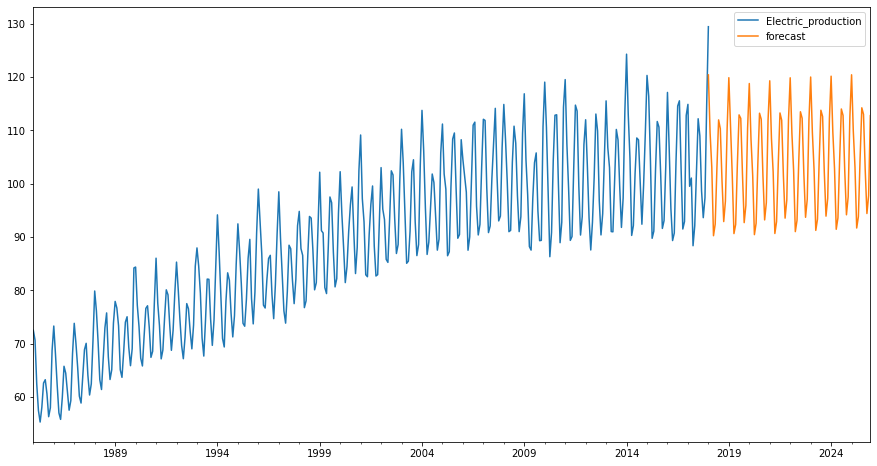

In [143]:
future_data['forecast'] = results.predict(start = 396, end = 800, dynamic= True)  
future_data[['Electric_production', 'forecast']].plot(figsize=(15, 8))